# Librerias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

c:\Users\crist\Desktop\Procesamiento Comentarios docentes\Procesamiento-de-comentarios\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Carga de los datos 

Los datos vienen con su respectiva etiqueta correspondiente a cada cluster.


In [5]:
df = pd.read_csv('../Datos/PlanComun2019-2023.csv')    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32491 entries, 0 to 32490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comentario    32491 non-null  object
 1   nombre_curso  32491 non-null  object
 2   tipo          32491 non-null  int64 
 3   codigo        32491 non-null  object
 4   semestre      32491 non-null  object
 5   codigo_curso  32491 non-null  object
 6   seccion       32491 non-null  int64 
 7   anho          32491 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.0+ MB


In [5]:
positivos = pd.read_csv('..\Datos\positivos_cluster.csv')
negativos = pd.read_csv('..\Datos\\negativos_cluster.csv')

# Latent Dirichlet Allocation (LDA)

Este modelo nos servira para interpretar que tipo de comentarios agrupa cada cluster. De esta forma, podremos nombrar cada cluster con un nombre descriptivo.

In [3]:
import nltk
nltk.download('stopwords')
stopword_es = nltk.corpus.stopwords.words('spanish')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import gensim

In [12]:
from gensim import models, corpora
from gensim.utils import simple_preprocess

stopwords = set(['y','que','https','el','lo','un','en','la','del'
'tu','las','ya','por','esa','las','eso','qué','sin','su','están','esto'
'es','una','más','mas','tiene','q','t','co','de','para','esto','los','son','con'
'se','le','al','cuando','e','user','como','es','si','tienen','se','con','del'
'pero','sus','te','muy','del','me','mucho','no','he','pero','da','nos','ademas','hace','todo'
])

stopwords.update(stopword_es)

tokens = [
    [word for word in simple_preprocess(comentario, deacc=True) if word not in stopwords]
    for comentario in df1['comentario']
]

dictionary = corpora.Dictionary(tokens)
#no_below -> tokens en al menos X documentos los que no se seran eliminados y que no esten contenidos en mas del 50% de los documentos (no_above)
dictionary.filter_extremes(no_below=50, no_above=0.8)

# Crear el corpus en el formato que LDA espera
corpus = [dictionary.doc2bow(token) for token in tokens]


# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

In [ ]:
df['comentario']

In [8]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]


In [9]:
dic = [[(id2word[i], freq) for i, freq in doc] for doc in corpus[:5]]


In [110]:
tokens

[['explico', 'bien', 'preocupo', 'inquietudes', 'profesor', 'auxiliares'],
 ['usaba', 'powerpoints', 'materia', 'pasada', 'clases'],
 ['interesante',
  'relacion',
  'contenidos',
  'curso',
  'realidad',
  'agradecido',
  'equipo',
  'docente',
  'jennifer',
  'rocio',
  'clases',
  'auxiliares',
  'ayudarnos',
  'largo',
  'semestre'],
 ['excelentes', 'auxs'],
 ['primer',
  'probablemente',
  'unico',
  'ramo',
  'teorico',
  'plan',
  'comun',
  'evaluado',
  'capacidad',
  'analisis',
  'problemas',
  'fisicos',
  'vez',
  'centrar',
  'ramo',
  'calculos',
  'extensos',
  'profesor',
  'explica',
  'bien',
  'catedras',
  'utiliza',
  'programas',
  'videos',
  'ilustrar',
  'mejor',
  'explicaciones',
  'ejemplos',
  'ramo',
  'exigente',
  'aprenden',
  'muchas',
  'ideas',
  'importantes',
  'ingenieria',
  'diferencias',
  'macroscopico',
  'microscopico',
  'ciclo',
  'carnot',
  'metodos',
  'explicar',
  'sistemas',
  'grandes',
  'mediante',
  'estadistica',
  'etc',
  'au

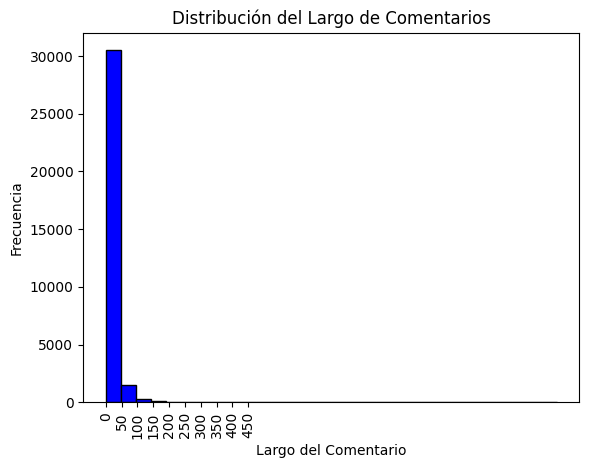

In [8]:
# Largo de los comentarios tokenizados
tokens = [
    [word for word in simple_preprocess(comentario, deacc=True) if word not in stopwords]
    for comentario in df['comentario']
]

# Largo de los comentarios tokenizados

largo_tokens = [len(token) for token in tokens]

# Crear un histograma para visualizar la distribución del largo

plt.hist(largo_tokens, bins=30, color='blue', edgecolor='black')

# Añadir etiquetas y título al gráfico

plt.xlabel('Largo del Comentario')
plt.ylabel('Frecuencia')
plt.title('Distribución del Largo de Comentarios')

plt.xticks(np.arange(0, 500, 50), rotation=90)

# Mostrar el gráfico

plt.show()

In [9]:
# Eliminar todos los comentarios con largo menor a 3 y mayor a 100

df1 = df.copy()

df1['tokens'   ] = tokens

df1 = df1[df1['tokens'].apply(len) < 100]
df1 = df1[df1['tokens'].apply(len) > 3]

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27225 entries, 0 to 32490
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comentario    27225 non-null  object
 1   nombre_curso  27225 non-null  object
 2   tipo          27225 non-null  int64 
 3   codigo        27225 non-null  object
 4   semestre      27225 non-null  object
 5   codigo_curso  27225 non-null  object
 6   seccion       27225 non-null  int64 
 7   anho          27225 non-null  int64 
 8   tokens        27225 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.1+ MB


In [10]:
df1.head()

,comentario,nombre_curso,tipo,codigo,semestre,codigo_curso,seccion,anho,tokens
0,Explicó bien y se preocupó mucho por las inqui...,Termodinámica,1,FI2004-2,Otoño,FI2004,2,2019,"[explico, bien, preocupo, inquietudes, profeso..."
1,Usaba powerpoints con la materia pasada en clases,Termodinámica,1,FI2004-2,Otoño,FI2004,2,2019,"[usaba, powerpoints, materia, pasada, clases]"
2,Muy interesante la relación de los contenidos ...,Termodinámica,1,FI2004-2,Otoño,FI2004,2,2019,"[interesante, relacion, contenidos, curso, rea..."
4,Es el primer (y probablemente el único) ramo t...,Termodinámica,1,FI2004-1,Otoño,FI2004,1,2019,"[primer, probablemente, unico, ramo, teorico, ..."
5,"Gran ramo, muy completo, se agradece la dispon...",Termodinámica,1,FI2004-1,Otoño,FI2004,1,2019,"[gran, ramo, completo, agradece, disponibilida..."


Definicion del numero de categorias mediante el seteo del numero de topicos.
Con 6 topicos, queda bastante segmentado a excepcion de dos topicos que se intersectan en algunos terminos

In [13]:
from gensim.models import LdaModel

# Set training parameters.
num_topics = 8
chunksize = 5000 # numero de documentos procesados a la vez
passes = 20 # cantidad de veces que se pasa por el total del corpus
iterations = 400 # cantidad de iteraciones durante el entrenamiento
eval_every = None  # Don't evaluate model perplexity, takes too much time.

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state=1,
    minimum_probability=0.3
)

In [126]:
from gensim.models import LdaModel

# Set training parameters.
num_topics = 8
chunksize = 5000 # numero de documentos procesados a la vez
passes = 20 # cantidad de veces que se pasa por el total del corpus
iterations = 400 # cantidad de iteraciones durante el entrenamiento
eval_every = None  # Don't evaluate model perplexity, takes too much time.

model1 = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state=1,
    minimum_probability=0.3
)

In [14]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(model, corpus, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.134755 -0.050406       1        1  16.149280
5      0.075930  0.117410       2        1  16.139733
0     -0.250151  0.017244       3        1  15.331736
2     -0.124895 -0.044528       4        1  12.910216
7      0.141477 -0.018870       5        1  12.445603
1     -0.199496 -0.203817       6        1  10.051140
6     -0.055753  0.276294       7        1   9.610965
3      0.278133 -0.093326       8        1   7.361326, topic_info=           Term         Freq        Total Category  logprob  loglift
76        profe  3346.000000  3346.000000  Default  30.0000  30.0000
7       materia  5017.000000  5017.000000  Default  29.0000  29.0000
113       dudas  2749.000000  2749.000000  Default  28.0000  28.0000
78      siempre  4031.000000  4031.000000  Default  27.0000  27.0000
0    auxiliares  5087.000000  5087.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
60       videos   200.664659   692.602028   Topic8  -4.9630   1.3701
42        mejor   269.471716  2950.803990   Topic8  -4.6681   0.2156
676       poder   210.186426   978.789732   Topic8  -4.9166   1.0706
12        curso   239.082743  6857.691179   Topic8  -4.7878  -0.7474
671      podria   205.060200  1095.599600   Topic8  -4.9413   0.9332

[547 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
603       6  0.990771    abierto
1236      1  0.980767  aburridas
498       2  0.997266  academica
604       1  0.081516    aclarar
604       6  0.915484    aclarar
...     ...       ...        ...
1185      1  0.994177        voz
1317      5  0.917444       wims
1317      7  0.067959       wims
1305      6  0.965500       zoom
1305      7  0.026332       zoom

[1053 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 1, 3, 8, 2, 7, 4])

In [133]:
# preparar textos para predicción de tópicos

# Crear una lista de los tokens de cada comentario

tokens = [[word for word in simple_preprocess(comentario, deacc=True) if word not in stopwords] for comentario in df['comentario']]
corpus1 = [dictionary.doc2bow(token) for token in tokens]


In [15]:
from pprint import pprint


pprint(model.print_topics())
doc_lda = model1[corpus]

[(0,
  '0.052*"auxiliares" + 0.044*"docente" + 0.042*"clases" + 0.037*"buena" + '
  '0.037*"profesor" + 0.028*"siempre" + 0.028*"disposicion" + 0.026*"curso" + '
  '0.023*"buen" + 0.023*"equipo"'),
 (1,
  '0.068*"dudas" + 0.056*"siempre" + 0.040*"profesor" + 0.029*"responder" + '
  '0.026*"alumnos" + 0.025*"estudiantes" + 0.021*"clase" + 0.020*"resolver" + '
  '0.019*"disposicion" + 0.018*"buena"'),
 (2,
  '0.068*"materia" + 0.052*"bien" + 0.034*"contenidos" + 0.033*"clases" + '
  '0.029*"ejercicios" + 0.024*"manera" + 0.024*"explica" + 0.023*"entender" + '
  '0.019*"forma" + 0.019*"ejemplos"'),
 (3,
  '0.055*"tiempo" + 0.041*"actividades" + 0.038*"tareas" + 0.026*"entrega" + '
  '0.019*"hacer" + 0.018*"realizar" + 0.016*"notas" + 0.016*"tarea" + '
  '0.015*"laboratorios" + 0.014*"evaluaciones"'),
 (4,
  '0.039*"clases" + 0.037*"veces" + 0.034*"clase" + 0.022*"materia" + '
  '0.014*"podria" + 0.014*"hacer" + 0.013*"profesor" + 0.013*"ser" + '
  '0.011*"solo" + 0.011*"cosas"'),
 (5,
  '

NameError: name 'model1' is not defined

# Evaluación

In [41]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model, texts=tokens, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)


Coherence Score:  0.5764660505774057


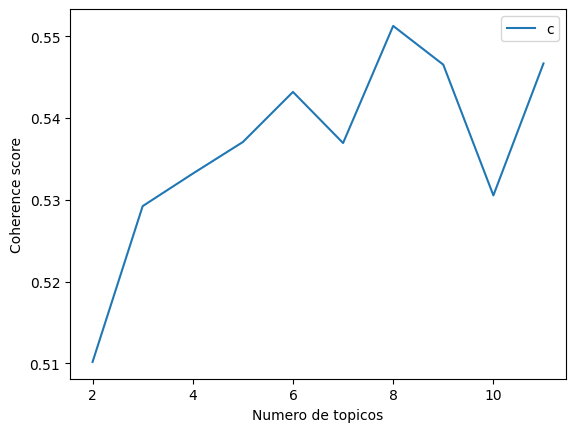

In [56]:
## Evaluacion de coherence score para distintos numeros de topicos

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Computa los valores de coherencia para distintos numeros de topicos

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : Lista de input texts
    limit : Maximo numero de topicos

    Returns:
    -------
    model_list : Lista de modelos LDA
    coherence_values : Coherence values correspondientes a los modelos LDA con valores de numero de topicos
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state=1,
    minimum_probability=0.3
)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


# Ejecutar la funcion anterior
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokens, start=2, limit=12, step=1)

# Mostrar los valores de coherence score
limit=12; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Numero de topicos")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Visualización

In [178]:
## Visualizacion de los topicos
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(model1, corpus, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.134755 -0.050406       1        1  16.151266
5      0.075930  0.117410       2        1  16.143600
0     -0.250151  0.017244       3        1  15.332083
2     -0.124895 -0.044528       4        1  12.919489
7      0.141477 -0.018870       5        1  12.440997
1     -0.199496 -0.203817       6        1  10.047700
6     -0.055753  0.276294       7        1   9.609014
3      0.278133 -0.093326       8        1   7.355851, topic_info=           Term         Freq        Total Category  logprob  loglift
76        profe  3346.000000  3346.000000  Default  30.0000  30.0000
7       materia  5020.000000  5020.000000  Default  29.0000  29.0000
113       dudas  2748.000000  2748.000000  Default  28.0000  28.0000
78      siempre  4030.000000  4030.000000  Default  27.0000  27.0000
0    auxiliares  5087.000000  5087.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
60       videos   200.515412   692.695676   Topic8  -4.9630   1.3700
42        mejor   269.271293  2950.986681   Topic8  -4.6681   0.2155
676       poder   210.030097   978.784797   Topic8  -4.9166   1.0706
12        curso   238.904922  6858.569092   Topic8  -4.7878  -0.7475
671      podria   204.907683  1095.556504   Topic8  -4.9413   0.9332

[547 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
603       6  0.991108    abierto
1236      1  0.980649  aburridas
498       2  0.997028  academica
604       1  0.081540    aclarar
604       6  0.915762    aclarar
...     ...       ...        ...
1185      1  0.994056        voz
1317      5  0.917770       wims
1317      7  0.067983       wims
1305      6  0.965825       zoom
1305      7  0.026341       zoom

[1053 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 1, 3, 8, 2, 7, 4])

In [97]:
pprint(model.print_topics())
doc_lda = model[corpus]

[(0,
  '0.061*"profe" + 0.059*"docente" + 0.041*"curso" + 0.035*"equipo" + '
  '0.034*"buen" + 0.030*"gracias" + 0.027*"ramo" + 0.027*"mejor" + '
  '0.024*"auxiliares" + 0.023*"aux"'),
 (1,
  '0.041*"estudiantes" + 0.032*"curso" + 0.026*"profesor" + 0.025*"problemas" '
  '+ 0.023*"parte" + 0.020*"comunicacion" + 0.019*"aprendizaje" + '
  '0.018*"alumnos" + 0.016*"docente" + 0.015*"participacion"'),
 (2,
  '0.043*"veces" + 0.030*"clase" + 0.024*"mejorar" + 0.021*"ser" + '
  '0.019*"clases" + 0.019*"hacer" + 0.017*"podria" + 0.014*"muchas" + '
  '0.014*"tiempo" + 0.013*"quizas"'),
 (3,
  '0.074*"profesor" + 0.035*"alumnos" + 0.032*"aprendizaje" + 0.031*"nota" + '
  '0.030*"buen" + 0.029*"estudiantes" + 0.023*"clases" + 0.023*"ambiente" + '
  '0.022*"siempre" + 0.020*"ensenar"'),
 (4,
  '0.107*"materia" + 0.068*"bien" + 0.035*"contenidos" + 0.031*"explica" + '
  '0.030*"entender" + 0.029*"explicar" + 0.028*"forma" + 0.027*"manera" + '
  '0.023*"ejemplos" + 0.022*"profesor"'),
 (5,
  '0.04

In [31]:
prueba = pd.read_csv('..\Datos\PlanComun2023-otono.csv')

<>:1: DeprecationWarning: invalid escape sequence \D
<>:1: DeprecationWarning: invalid escape sequence \D
C:\Users\crist\AppData\Local\Temp\ipykernel_7144\3159921313.py:1: DeprecationWarning: invalid escape sequence \D
  prueba = pd.read_csv('..\Datos\PlanComun2023-otono.csv')


In [ ]:
tokens = [[word for word in simple_preprocess(comentario, deacc=True) if word not in stopwords] for comentario in prueba['comentario']]
corpus1 = [dictionary.doc2bow(token) for token in tokens]

In [25]:
df3 = pd.read_csv('..\Datos\PlanComun2023-otono-labeled.csv')

<>:1: DeprecationWarning: invalid escape sequence \D
<>:1: DeprecationWarning: invalid escape sequence \D
C:\Users\crist\AppData\Local\Temp\ipykernel_7144\2956131220.py:1: DeprecationWarning: invalid escape sequence \D
  df3 = pd.read_csv('..\Datos\PlanComun2023-otono-labeled.csv')


In [ ]:
prueba['topico'] = prueba['comentario'].apply(lambda x: model.get_document_topics(corpus))

In [141]:
df['topico'] = df['comentario'].apply(lambda x: model1.get_document_topics(corpus))


In [144]:
df['topico']

0        ([(1, 0.34705967), (2, 0.53315586)], [(2, 0.76...
1        ([(1, 0.3471062), (2, 0.5330803)], [(2, 0.7633...
2        ([(1, 0.3470752), (2, 0.5331321)], [(2, 0.7633...
3        ([(1, 0.3471036), (2, 0.53308487)], [(2, 0.763...
4        ([(1, 0.34707746), (2, 0.53312844)], [(2, 0.76...
                               ...                        
32486    ([(1, 0.34710246), (2, 0.5330869)], [(2, 0.763...
32487    ([(1, 0.34705594), (2, 0.53316134)], [(2, 0.76...
32488    ([(1, 0.3470601), (2, 0.5331552)], [(2, 0.7633...
32489    ([(1, 0.3471086), (2, 0.5330761)], [(2, 0.7633...
32490    ([(1, 0.34708622), (2, 0.5331143)], [(2, 0.763...
Name: topico, Length: 32491, dtype: object

In [105]:
# largo del comentario

texto = 'buen profe'

largo = len(texto)

print(largo)

10


In [104]:
df1.comentario.tolist()

['Explicó bien y se preocupó mucho por las inquietudes, tanto el profesor como las auxiliares',
 'Usaba powerpoints con la materia pasada en clases',
 'Muy interesante la relación de los contenidos del curso con la realidad. \n\nAgradecido del equipo docente (Jennifer y Rocío) por las clases auxiliares y ayudarnos a lo largo el semestre.',
 'Excelentes los auxs',
 'Gran ramo, muy completo, se agradece la disponibilidad del profesor.',
 'Es muy buen profesor, sus clases son interesantes y me motivan a seguir aprendiendo. Esto también aplica para los auxiliares.',
 'Gigante el profe! Realmente fue un gusto tener este ramo con el, se preocupo desde el inicio de nuestro desempeño y que este solo fuese mejorando a traves del semestre, los controles muy acorde a lo enseñado en clases, sin sorpresas, lo que siempre se agradece,. Gran equipo docente',
 'Excelente profesor y excelentes auxiliares.\n\nHasta antes de este ramo yo odiaba con la vida la física. No lograba hacer ni un ejercicio.\n\n

In [102]:
df1.tail(10)

,comentario,nombre_curso,tipo,codigo,semestre,codigo_curso,seccion,anho,topico
32481,En algunas ocasiones las explicaciones resulta...,Introducción al Cálculo,0,MA1001-1,Otoño,MA1001,1,2023,"[(2, 0.64732224)]"
32482,A veces decía comentarios sobre compañeros con...,Introducción al Cálculo,0,MA1001-1,Otoño,MA1001,1,2023,"[(2, 0.83751863)]"
32483,"A veces podía ser un poco egocéntrico, o dejar...",Introducción al Cálculo,0,MA1001-1,Otoño,MA1001,1,2023,"[(2, 0.59428644)]"
32484,ir con más calma en el momento de explicar el ...,Introducción al Cálculo,0,MA1001-1,Otoño,MA1001,1,2023,"[(2, 0.41726664), (4, 0.4738095)]"
32485,"Un aspecto, el cual sí me llegó a causar un po...",Introducción al Cálculo,0,MA1001-1,Otoño,MA1001,1,2023,"[(3, 0.53942215)]"
32486,Como docente en el aula creo que se maneja muy...,Introducción al Cálculo,0,MA1001-1,Otoño,MA1001,1,2023,"[(2, 0.3920513)]"
32487,"Algunas veces, la materia vista en la cátedra ...",Introducción al Cálculo,0,MA1001-1,Otoño,MA1001,1,2023,"[(0, 0.33992442)]"
32488,"Se nota mucho el interés y pasión por enseñar,...",Introducción al Cálculo,0,MA1001-1,Otoño,MA1001,1,2023,"[(2, 0.43874705), (4, 0.3466392)]"
32489,El profesor San Martin es buen docente en todo...,Introducción al Cálculo,0,MA1001-1,Otoño,MA1001,1,2023,"[(2, 0.4347428), (3, 0.33716124)]"
32490,evitar comentarios desubicados y repetitividad...,Introducción al Cálculo,0,MA1001-1,Otoño,MA1001,1,2023,"[(2, 0.8556397)]"


In [175]:
df['topico'] = df['comentario'].apply(lambda x: model1.get_document_topics(dictionary.doc2bow(x.split()), minimum_probability=0.3
                                                                           ))


In [176]:
df.head(10)

,comentario,nombre_curso,tipo,codigo,semestre,codigo_curso,seccion,anho,topico
0,Explicó bien y se preocupó mucho por las inqui...,Termodinámica,1,FI2004-2,Otoño,FI2004,2,2019,"[(0, 0.3926366), (2, 0.4150915)]"
1,Usaba powerpoints con la materia pasada en clases,Termodinámica,1,FI2004-2,Otoño,FI2004,2,2019,"[(2, 0.7633476)]"
2,Muy interesante la relación de los contenidos ...,Termodinámica,1,FI2004-2,Otoño,FI2004,2,2019,"[(0, 0.7681977)]"
3,Excelentes los auxs,Termodinámica,1,FI2004-1,Otoño,FI2004,1,2019,"[(6, 0.52630484)]"
4,Es el primer (y probablemente el único) ramo t...,Termodinámica,1,FI2004-1,Otoño,FI2004,1,2019,"[(2, 0.3885184), (5, 0.37701187)]"
5,"Gran ramo, muy completo, se agradece la dispon...",Termodinámica,1,FI2004-1,Otoño,FI2004,1,2019,"[(0, 0.695397)]"
6,"Es muy buen profesor, sus clases son interesan...",Termodinámica,1,FI2004-1,Otoño,FI2004,1,2019,"[(0, 0.5659356)]"
7,Gigante el profe! Realmente fue un gusto tener...,Electromagnetismo,1,FI2002-4,Otoño,FI2002,4,2019,"[(5, 0.5990514)]"
8,Excelente profesor y excelentes auxiliares.\n\...,Electromagnetismo,1,FI2002-4,Otoño,FI2002,4,2019,"[(0, 0.3987101), (6, 0.3730623)]"
9,El profe fue muy comprensivo a través de todo ...,Electromagnetismo,1,FI2002-4,Otoño,FI2002,4,2019,"[(0, 0.39470842), (5, 0.47975516)]"


In [32]:
# obtenr el topico mas probable

def obtener_topico(comentario):
    doc_bow = dictionary.doc2bow(comentario.split())
    topics = model.get_document_topics(doc_bow)
    
    # Verificar si la lista de tópicos está vacía antes de acceder a los índices
    if topics:
        # Ordenar los tópicos por probabilidad en orden descendente y tomar el más probable
        topico_mas_probable = max(topics, key=lambda x: x[1])
        return topico_mas_probable[0]
    else:
        return None  # O cualquier valor que desees asignar para los comentarios sin tópicos asignados

# Aplicar la función a la columna 'comentario' para obtener la columna 'topico'
prueba['topico'] = prueba['comentario'].apply(obtener_topico)

# Mostrar el DataFrame resultante
prueba.head(11)


,comentario,codigo_semestre,nombre_curso,tipo,topico
0,"muy buena disposición, abordando una temática ...",CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,5.0
1,"El curso fue todo un descubrimiento para mi, n...",CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,6.0
2,Muy simpáticos y con buena voluntad de ayudar,CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,0.0
3,"Compromiso aprendizaje, explicaba bien si uno ...",CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,2.0
4,"súper didactico y flexible, es un ramo super e...",CD2201-8 - Otoño 2023,Módulo Interdisciplinario,1,6.0
5,"Si funciona, funciona!",CD2201-8 - Otoño 2023,Módulo Interdisciplinario,1,NaN
6,"Es un muy buen docente, siempre dispuesto a ay...",CD2201-8 - Otoño 2023,Módulo Interdisciplinario,1,6.0
7,Profesores apasionados y muy dispuestos a ense...,CD2201-8 - Otoño 2023,Módulo Interdisciplinario,1,1.0
8,Buena metodologia,CD2201-8 - Otoño 2023,Módulo Interdisciplinario,1,2.0
9,execelente curso y aun mejores profesores,CD2201-8 - Otoño 2023,Módulo Interdisciplinario,1,6.0


In [23]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4241 entries, 0 to 4240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comentario       4241 non-null   object 
 1   codigo_semestre  4241 non-null   object 
 2   nombre_curso     4241 non-null   object 
 3   tipo             4241 non-null   int64  
 4   topico           4241 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 165.8+ KB


In [26]:
df4 = pd.read_csv('../Datos/PlanComun2023-otono-labeled.csv')


In [24]:
prueba.to_csv('..\Datos\PlanComun2023-otono-labeled.csv', index=False)

<>:1: DeprecationWarning: invalid escape sequence \D
<>:1: DeprecationWarning: invalid escape sequence \D
C:\Users\crist\AppData\Local\Temp\ipykernel_7144\614859136.py:1: DeprecationWarning: invalid escape sequence \D
  prueba.to_csv('..\Datos\PlanComun2023-otono-labeled.csv', index=False)


In [33]:
prueba['topico'] = prueba['topico'].fillna(99)

prueba[prueba['topico'] == 99].sample(10).comentario.tolist()

['Excelente desempeño, nada que decir. :)',
 'el interés por enseñar',
 'Es un genio.',
 'Hermanito, chiste repetido, podrido.',
 'Resultaban un tanto agenos en los trabajos, pero fuera de eso, geniales.',
 'Si funciona, funciona!',
 "'Siempre muy dedicada.",
 'Nada',
 'Nada',
 'Mención especial a ambos auxiliares, los mejores que he tenido en mi vida, anteriormente eliminé este curso 2 veces, nunca comprendí nada, sin embargo Camila y Vicente fueron un 7, a mi en lo personal, al haber tenido mis primeros 2 años online, me costaba mucho la parte matemática, identificar los dS, dl, etc. sin embargo en sus clases se daban el tiempo de explicar de donde salían, resolvían las integrales aunque fueran fáciles como en Gauss, donde solo era un EdS, pero lo explicaban todas las veces y eso, por lo menos yo, lo agradezco demasiado :)\n\nTodo esto sin mencionar la gran disposición de ambos, para horarios de consultas y respondiendo correos \n\nMuy feliz de haber tomado este ramo con ellos como a

In [353]:
## reemplazar los valores Nan por 99 y mostrar el dataframe filtrado

df['topico1'] = df['topico1'].fillna(99)

df[df['topico1'] == 99].sample(10).comentario.tolist()

['Comentare respecto a los auxiliares y a la profesora\n\nCon respecto a la profesora: Me gustaba como explicaba, era ordenada para pasar los contenidos y a mi parecer explica bien, sigue una linea de demostrar las cosas y hacerlas en orden cronologico que al menos a mi me hacia entender mejor la materia tan obstusa que se nos presentaba, si me perdía generalmente era porque siento que la materia excedia nuestros conocimientos, deja claro las reglas del curso al inicio y lo deja vigente en el material docente, con respecto a los mini ejercicios solo creo que sería preferible tener una clase auxiliar relacionada a lo preguntado antes de cada mini control, pero cuadrar los tiempos debe ser complicado asi que lo encuentro comprensible, por ultimo la profesora solia decir problemas avanzados que podiamos hacer finalizando la clase y parecia abierta al dialogo a la hora de los controles y la materia preguntada en estos.\n\nCon respecto a los auxiliares:\n\nA la vale la encuentro muy buena y

In [354]:
df[df['topico1'] == 99]

,comentario,nombre_curso,tipo,codigo,semestre,codigo_curso,seccion,anho,Etiqueta_jerarquico,Etiqueta_kmeans,topic,tokens,kmean,Agglomerativo,topico1
16,Me tocó un gran profesor. Fue capaz de motivar...,Electromagnetismo,1,FI2002-4,Otoño,FI2002,4,2019,2.0,3.0,Valoración del curso y sus contenidos,NaN,NaN,NaN,99.0
153,Mejooor profeee que he conocido en la U. Motiv...,Economía,1,IN2201-2,Otoño,IN2201,2,2019,1.0,0.0,NaN,NaN,NaN,NaN,99.0
158,El mjr profeeeee 🥰🙌🏻,Economía,1,IN2201-2,Otoño,IN2201,2,2019,0.0,0.0,NaN,NaN,NaN,NaN,99.0
169,"Gran curso. Como lo dije a mitad de semestre, ...",Economía,1,IN2201-2,Otoño,IN2201,2,2019,2.0,3.0,Valoración del curso y sus contenidos,NaN,NaN,NaN,99.0
195,Algo que quiero destacar es que al principio d...,Cálculo Avanzado y Aplicaciones,1,MA2002-2,Otoño,MA2002,2,2019,2.0,3.0,Valoración del curso y sus contenidos,NaN,NaN,NaN,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,"Sus clases no eran dinámicas y eran confusas, ...",Introducción al Cálculo,0,MA1001-4,Otoño,MA1001,4,2023,NaN,NaN,Experiencia de clases,35.0,0.0,2.0,99.0
30848,Hablar mas fuerte,Introducción al Cálculo,0,MA1001-4,Otoño,MA1001,4,2023,NaN,NaN,Experiencia de clases,3.0,2.0,0.0,99.0
30853,"se enreda mucho, hace dudar",Introducción al Cálculo,0,MA1001-4,Otoño,MA1001,4,2023,NaN,NaN,NaN,6.0,0.0,0.0,99.0
30895,A pesar de ser bueno explicando la materia sie...,Introducción al Cálculo,0,MA1001-1,Otoño,MA1001,1,2023,NaN,NaN,Experiencia general del curso,171.0,1.0,2.0,99.0


In [363]:
pprint(model1.print_topics())

[(0,
  '0.052*"auxiliares" + 0.044*"docente" + 0.042*"clases" + 0.037*"buena" + '
  '0.037*"profesor" + 0.028*"siempre" + 0.028*"disposicion" + 0.026*"curso" + '
  '0.023*"buen" + 0.023*"equipo"'),
 (1,
  '0.068*"dudas" + 0.056*"siempre" + 0.040*"profesor" + 0.029*"responder" + '
  '0.026*"alumnos" + 0.025*"estudiantes" + 0.021*"clase" + 0.020*"resolver" + '
  '0.019*"disposicion" + 0.018*"buena"'),
 (2,
  '0.068*"materia" + 0.052*"bien" + 0.034*"contenidos" + 0.033*"clases" + '
  '0.029*"ejercicios" + 0.024*"manera" + 0.024*"explica" + 0.023*"entender" + '
  '0.019*"forma" + 0.019*"ejemplos"'),
 (3,
  '0.055*"tiempo" + 0.041*"actividades" + 0.038*"tareas" + 0.026*"entrega" + '
  '0.019*"hacer" + 0.018*"realizar" + 0.016*"notas" + 0.016*"tarea" + '
  '0.015*"laboratorios" + 0.014*"evaluaciones"'),
 (4,
  '0.039*"clases" + 0.037*"veces" + 0.034*"clase" + 0.022*"materia" + '
  '0.014*"podria" + 0.014*"hacer" + 0.013*"profesor" + 0.013*"ser" + '
  '0.011*"solo" + 0.011*"cosas"'),
 (5,
  '

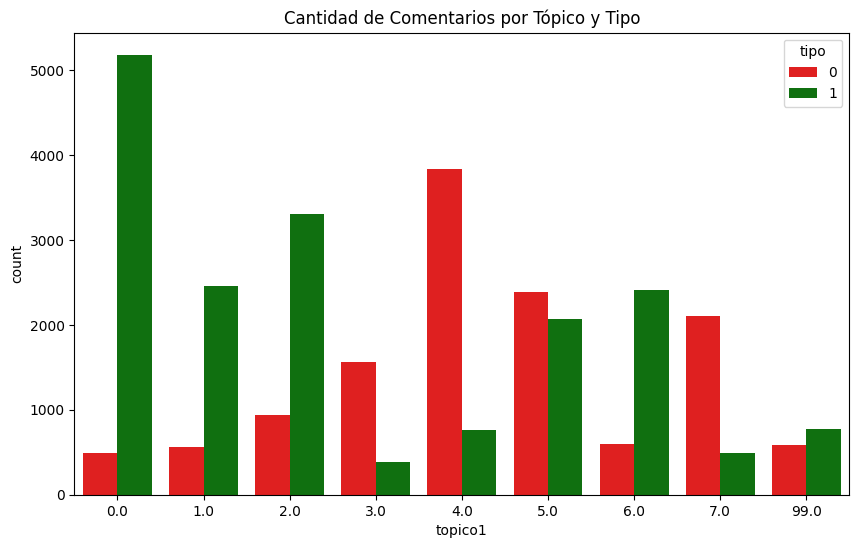

In [358]:
# Gráfico utilizando seaborn color red para tipo 0 y verde para tipo 1
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='topico1', hue='tipo', palette=['red', 'green'])
plt.title('Cantidad de Comentarios por Tópico y Tipo')
plt.show()

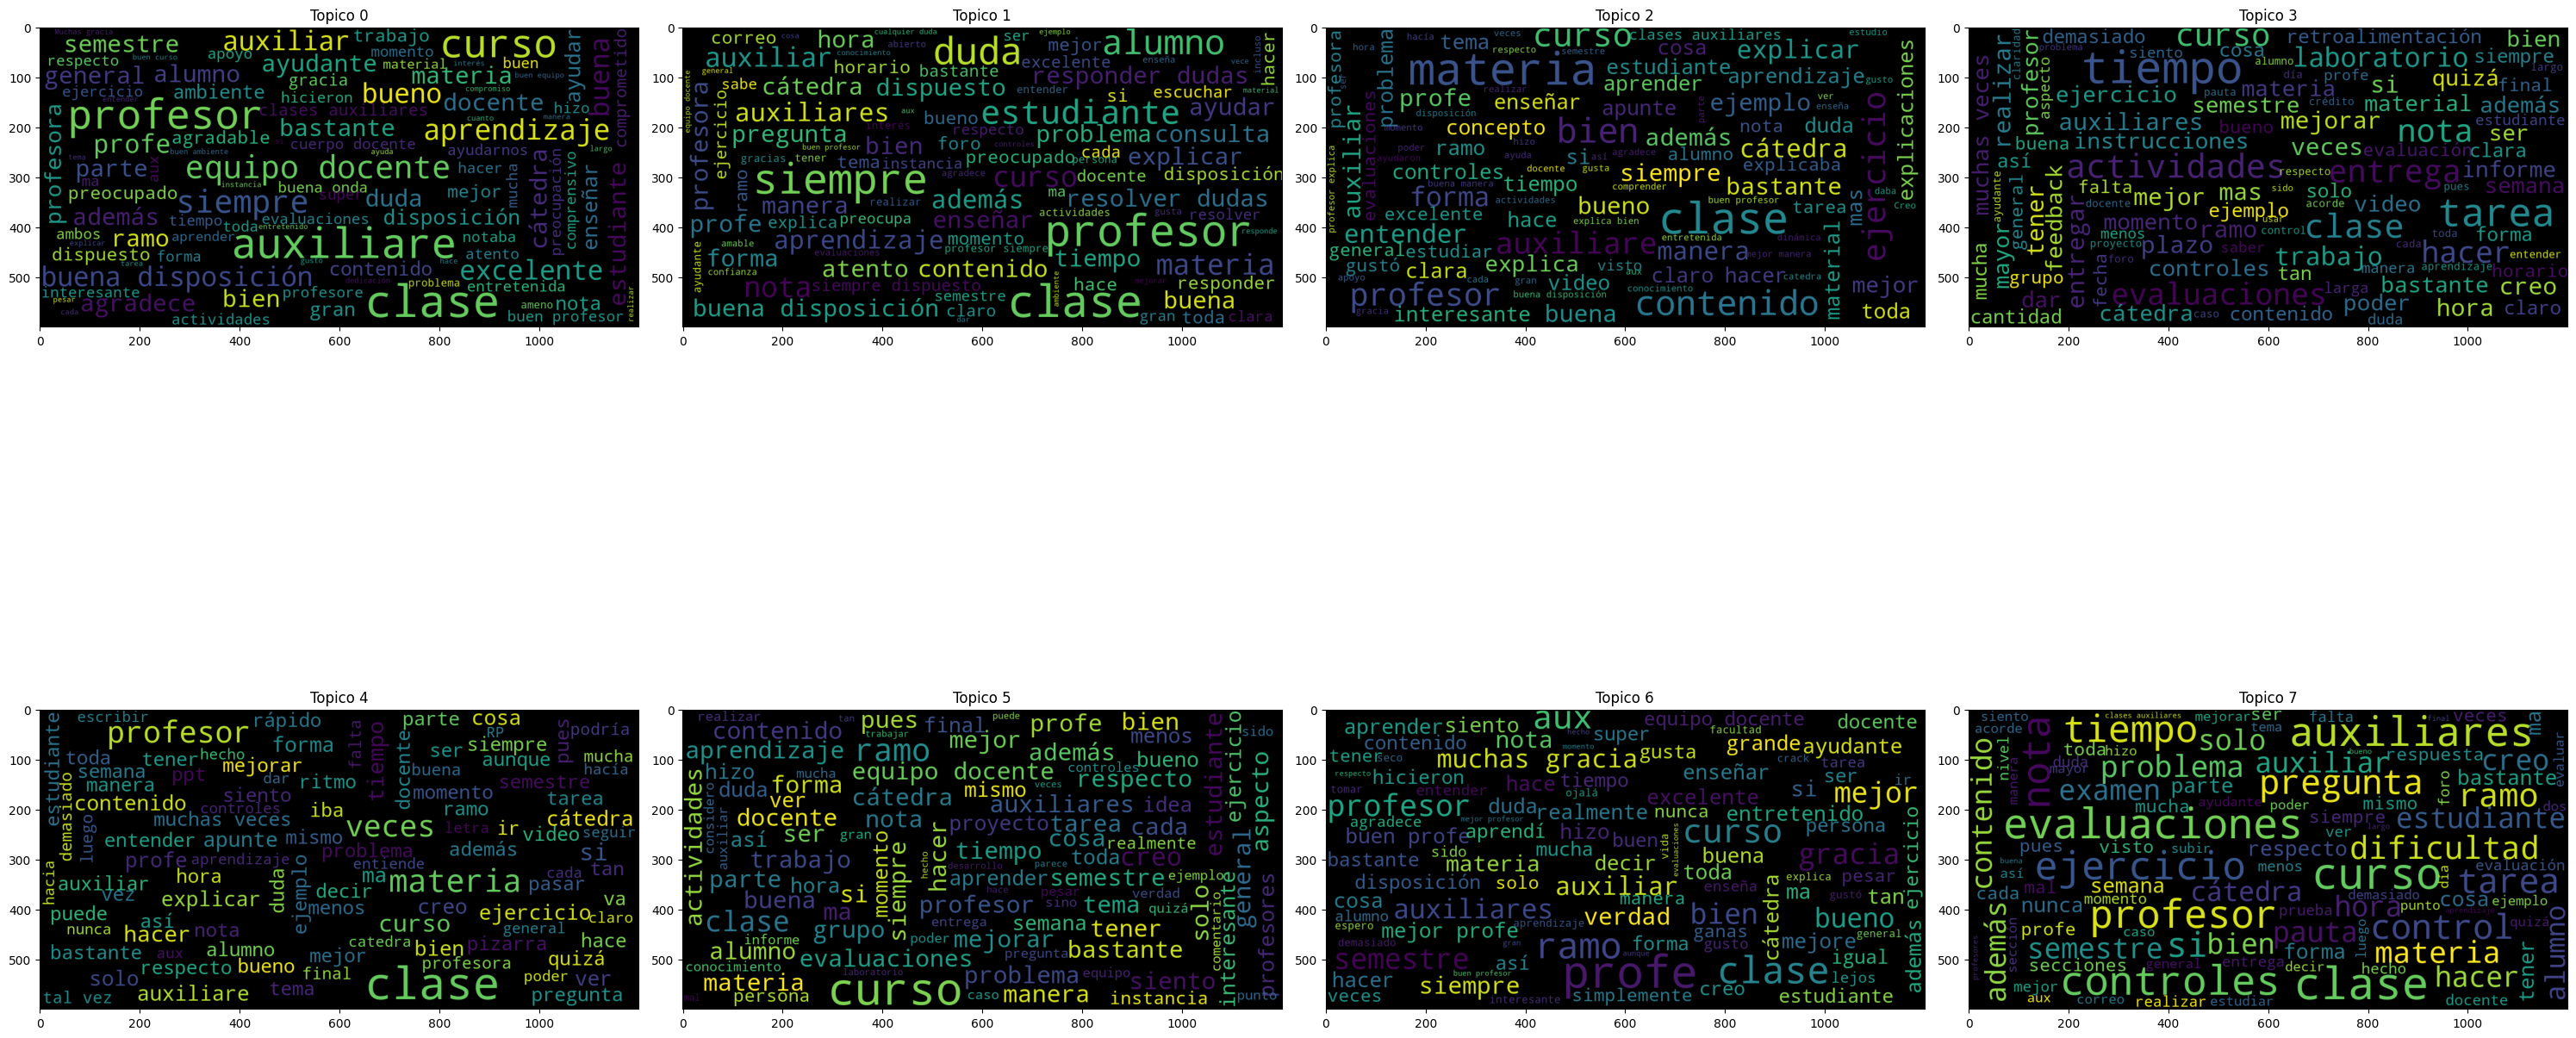

In [361]:
from wordcloud import WordCloud

def plot_wordcloud(data, col, i):
    # stopwords

    stopwords = set(stopword_es)
    text = ' '.join(data[col].astype(str).tolist())
    # Generar el wordcloud

    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1
    ).generate(text)

    # Mostrar la figura

    axs[i // 4, i % 4].imshow(wordcloud)


  
# Figura con las nubes para las 8 etiquetas

fig, axs = plt.subplots(2, 4, figsize=(30, 20))
for i in range(8):
    plot_wordcloud(df[df['topico1'] == i], 'comentario',i)
    ## nombre a cada grafico

    axs[i // 4, i % 4].set_title(f"Topico {i}")
plt.tight_layout()


In [367]:

df[(df['topico1'] == 7)]['comentario'].sample(5).tolist()

['Seria weno que entreeguen las pautas de los auxiliares, para que entendasmo ejericicos que no entendemos',
 'Facil de entenderle al profe, clases dinamicas y me pareció una buena idea que las clases fueran más cortas considerando el semestre de transición. Las evaluaciones estaban de acorde a lo visto en clase.',
 'Creo que se podrían tener más instancias de auxiliares o algo por el estilo, para que así ayude también para las tareas semanales y no sólo para los controles, quizás el estilo podrían ser vídeos pequeños en donde se realicen 1 o 2 problemas en relación al contenido semanal.',
 'Si bien no tengo ninguna experiencia negativa, lo único que me dejo un mal sabor de boca es lo tarde que se han entregado las notas de los informes, pese a eso igual se entiende.',
 'Las evaluaciones (ninguna de este semestre se parecía a los controles de años pasado) siento que la exigencia estaba alta']

In [2]:
## muestreo aleatorio de comentarios por topico

# Crear una lista de los comentarios por tópico y df.tipo == 0


df[(df['topico1'] == 7) & (df['tipo'] == 1)]['comentario'].sample(5).tolist()

NameError: name 'df' is not defined

In [58]:
prueba['topico'].unique()

array(['Experiencia y Organización del Curso',
       'Reconocimiento a Profesores y Auxiliares',
       'Experiencia Educativa', 'Calidad de la Enseñanza', 'Otros',
       'Atención y Disposición Docente',
       'Estilo de Enseñanza y Dinámica de Clases',
       'Gestión de Actividades y Evaluaciones',
       'Evaluaciones y Controles'], dtype=object)

In [37]:
courses_topics_mapping = {
    "Introducción al Cálculo": 0,
    "Introducción al Álgebra": 0,
    "Introducción a la Física Clásica": 0,
    "Herramientas Computacionales para Ingeniería y Ciencias": 0,
    "Desafíos de Innovación": 0,
    "Aplicaciones de la Biología a la Ingeniería y Ciencias": 0,

    "Cálculo Diferencial e Integral": 1,
    "Álgebra Lineal": 1,
    "Introducción a la Física Moderna": 1,
    "Introducción a la Programación": 1,
    "Proyecto de Innovación en Ingeniería y Ciencias": 1,

    "Cálculo en Varias Variables": 2,
    "Ecuaciones Diferenciales y Ordinarias": 2,
    "Mecánica": 2,
    "Métodos Experimentales": 2,
    "Química": 2,

    "Cálculo Avanzado y Aplicaciones": 3,
    "Economía": 3,
    "Electromagnetismo": 3,
    "Termodinámica": 3,
    "Termodinámica Química": 3,
    "Módulo Interdisciplinario": 3
}

##columna tipo de curso

prueba['semstre_malla'] = prueba['nombre_curso'].map(courses_topics_mapping)

In [42]:
prueba.head()

,comentario,codigo_semestre,nombre_curso,tipo,topico,semstre_malla,seccion
0,"muy buena disposición, abordando una temática ...",CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,Experiencia y Organización del Curso,3.0,CD2201
1,"El curso fue todo un descubrimiento para mi, n...",CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,Reconocimiento a Profesores y Auxiliares,3.0,CD2201
2,Muy simpáticos y con buena voluntad de ayudar,CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,Experiencia Educativa,3.0,CD2201
3,"Compromiso aprendizaje, explicaba bien si uno ...",CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,Calidad de la Enseñanza,3.0,CD2201
4,"súper didactico y flexible, es un ramo super e...",CD2201-8 - Otoño 2023,Módulo Interdisciplinario,1,Reconocimiento a Profesores y Auxiliares,3.0,CD2201


In [44]:
# creacion de columna seccion a partir de codigo_semestre que es del formato codigo-seccion - semestre año

prueba['seccion'] = prueba['codigo_semestre'].apply(lambda x: x.split('-')[1]
                                    )


prueba['codigo'] = prueba['codigo_semestre'].apply(lambda x: x.split('-')[0])


prueba['semestre'] = prueba['codigo_semestre'].apply(lambda x: x.split('-')[2])

In [47]:
prueba.to_csv('..\Datos\PlanComun2023-otono-labeled.csv', index=False)

<>:1: DeprecationWarning: invalid escape sequence \D
<>:1: DeprecationWarning: invalid escape sequence \D
C:\Users\crist\AppData\Local\Temp\ipykernel_7144\614859136.py:1: DeprecationWarning: invalid escape sequence \D
  prueba.to_csv('..\Datos\PlanComun2023-otono-labeled.csv', index=False)


In [46]:
prueba.head()

,comentario,codigo_semestre,nombre_curso,tipo,topico,semstre_malla,seccion,codigo,semestre
0,"muy buena disposición, abordando una temática ...",CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,Experiencia y Organización del Curso,3.0,9,CD2201,Otoño 2023
1,"El curso fue todo un descubrimiento para mi, n...",CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,Reconocimiento a Profesores y Auxiliares,3.0,9,CD2201,Otoño 2023
2,Muy simpáticos y con buena voluntad de ayudar,CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,Experiencia Educativa,3.0,9,CD2201,Otoño 2023
3,"Compromiso aprendizaje, explicaba bien si uno ...",CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,Calidad de la Enseñanza,3.0,9,CD2201,Otoño 2023
4,"súper didactico y flexible, es un ramo super e...",CD2201-8 - Otoño 2023,Módulo Interdisciplinario,1,Reconocimiento a Profesores y Auxiliares,3.0,8,CD2201,Otoño 2023


In [34]:
id2label = {
    0: "Experiencia Educativa",
    1: "Atención y Disposición Docente",
    2: "Calidad de la Enseñanza",
    3: "Gestión de Actividades y Evaluaciones",
    4: "Estilo de Enseñanza y Dinámica de Clases",
    5: "Experiencia y Organización del Curso",
    6: "Reconocimiento a Profesores y Auxiliares",
    7: "Evaluaciones y Controles",
    99:"Otros"
}

# Mapeo de los tópicos a las etiquetas

prueba['topico'] = prueba['topico'].map(id2label)
prueba.to_csv('..\Datos\PlanComun2023-otono-labeled.csv', index=False)

<>:16: DeprecationWarning: invalid escape sequence \D
<>:16: DeprecationWarning: invalid escape sequence \D
C:\Users\crist\AppData\Local\Temp\ipykernel_7144\3002481705.py:16: DeprecationWarning: invalid escape sequence \D
  prueba.to_csv('..\Datos\PlanComun2023-otono-labeled.csv', index=False)


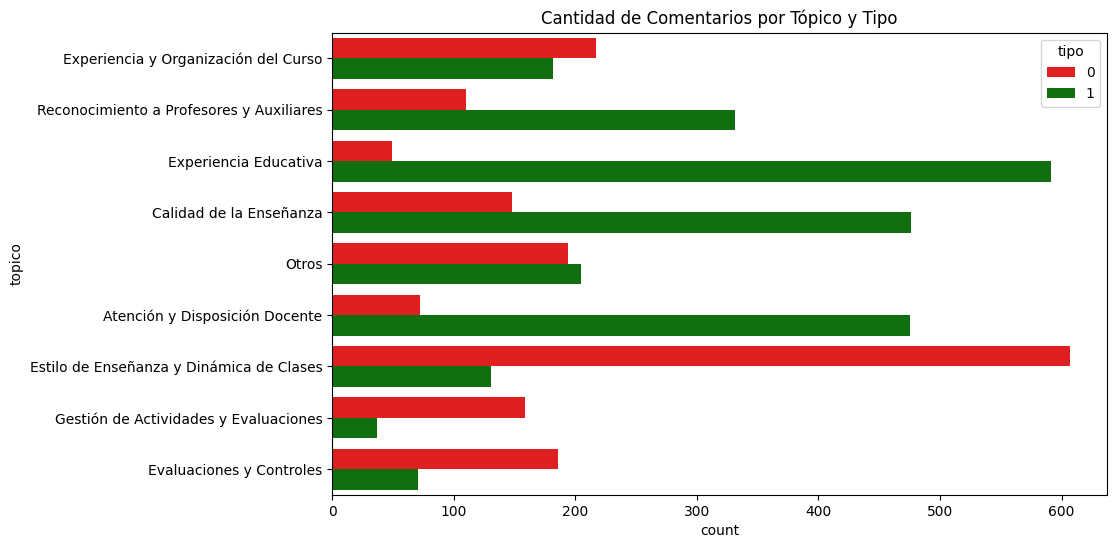

In [56]:
###  funcion para generarar el siguiente plot
# plt.figure(figsize=(10, 6)) 
# sns.countplot(data=df, x='topico1', hue='tipo', palette=['red', 'green'])
# plt.title('Cantidad de Comentarios por Tópico y Tipo')
# plt.show()

def plot_countplot(data, col, i):

    plt.figure(figsize=(10, 6)) 
    sns.countplot(data=data, y=col, hue='tipo', palette=['red', 'green'])
    plt.title('Cantidad de Comentarios por Tópico y Tipo')
   
    plt.show()

plot_countplot(prueba, 'topico', 1)

In [57]:
prueba.head()

,comentario,codigo_semestre,nombre_curso,tipo,topico,semstre_malla,seccion,codigo,semestre
0,"muy buena disposición, abordando una temática ...",CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,Experiencia y Organización del Curso,3.0,9,CD2201,Otoño 2023
1,"El curso fue todo un descubrimiento para mi, n...",CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,Reconocimiento a Profesores y Auxiliares,3.0,9,CD2201,Otoño 2023
2,Muy simpáticos y con buena voluntad de ayudar,CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,Experiencia Educativa,3.0,9,CD2201,Otoño 2023
3,"Compromiso aprendizaje, explicaba bien si uno ...",CD2201-9 - Otoño 2023,Módulo Interdisciplinario,1,Calidad de la Enseñanza,3.0,9,CD2201,Otoño 2023
4,"súper didactico y flexible, es un ramo super e...",CD2201-8 - Otoño 2023,Módulo Interdisciplinario,1,Reconocimiento a Profesores y Auxiliares,3.0,8,CD2201,Otoño 2023


**Nombre del Tópico 0:**
"Experiencia Educativa: Evaluación de la Calidad Docente y de Auxiliares"

**Descripción:**
Este tópico aborda las opiniones y evaluaciones de estudiantes sobre la calidad de la enseñanza proporcionada por el equipo docente y los auxiliares en un curso académico. Se discuten aspectos como la disposición, el entusiasmo, la claridad en la explicación, la participación, el compromiso y otros elementos que impactan la experiencia de aprendizaje. Los comentarios reflejan tanto aspectos positivos como áreas de mejora, proporcionando una visión completa de la dinámica educativa en el curso.

**Nombre del Tópico 1:**
"Atención y Disposición Docente: Respuestas a Dudas y Actitud hacia los Estudiantes"

**Descripción:**
Este tópico se centra en la interacción entre profesores y estudiantes, especialmente en cuanto a la disposición para resolver dudas. Los comentarios reflejan la dedicación, claridad y participación del profesor en el proceso educativo. Se abordan aspectos positivos como la preocupación por el aprendizaje, la comunicación efectiva, y la disposición para escuchar a los alumnos. También se mencionan áreas de mejora, como la necesidad de una mayor atención a correos electrónicos y una comunicación más dinámica en clase. La retroalimentación proporciona una visión completa de la experiencia educativa desde la perspectiva de la interacción profesor-estudiante.

**Nombre del Tópico 2:**
"Calidad de la Enseñanza: Contenidos, Explicación y Ejemplos"

**Descripción:**
Este tópico se centra en la evaluación de la calidad de la enseñanza, abordando la forma en que se presentan y explican los contenidos. Los comentarios reflejan opiniones sobre la comprensión de la materia, la claridad de las explicaciones, la efectividad de los ejemplos proporcionados y la percepción general sobre la enseñanza de los contenidos del curso. Se destaca tanto aspectos positivos, como la dinámica y la empatía de los profesores, como áreas de mejora, incluyendo la necesidad de una explicación más clara de los ejercicios y una mayor coherencia en la presentación de materiales.

**Nombre del Tópico 3:**
"Gestión de Actividades y Evaluaciones: Tiempos, Entregas y Retroalimentación"

**Descripción:**
Este tópico aborda la organización y gestión de actividades y evaluaciones en el curso. Los comentarios reflejan la percepción de los estudiantes sobre la disposición del profesor y auxiliares para responder dudas, la claridad en las instrucciones y el tiempo de entrega de notas. Se destacan tanto aspectos positivos, como la utilidad de las guías y el material de preparación, como áreas de mejora, incluyendo la necesidad de una mayor retroalimentación y claridad en las actividades. La retroalimentación proporciona una visión detallada de la experiencia de los estudiantes en cuanto a la planificación y ejecución de las tareas y evaluaciones.

**Nombre del Tópico 4:**
"Estilo de Enseñanza y Dinámica de Clases: Enfoque, Participación y Comunicación"

**Descripción:**
Este tópico aborda la dinámica de las clases, el estilo de enseñanza del profesor y la participación de los estudiantes. Los comentarios reflejan percepciones sobre la motivación, la claridad en la explicación, la interactividad en clase y la relación entre el contenido y la materia. Se destacan tanto aspectos positivos, como la participación activa y la disponibilidad del profesor, como áreas de mejora, incluyendo la necesidad de mayor motivación y claridad en la enseñanza. La retroalimentación proporciona una visión detallada de la experiencia de aprendizaje en términos de dinámica de clases y enfoque del profesor.

**Nombre del Tópico 5:**
"Experiencia y Organización del Curso: Valoración Global"

**Descripción:**
Este tópico se centra en la evaluación general del curso por parte de los estudiantes. Los comentarios reflejan aspectos positivos y áreas de mejora, abordando la estructura y organización del curso, la relación con los docentes, el nivel de compromiso y la utilidad percibida. Se destacan elementos como la empatía de los profesores, la organización del curso y la efectividad de la estructura de evaluación. La retroalimentación proporciona una visión general de la experiencia del curso, permitiendo identificar aspectos apreciados y posibles oportunidades de mejora.

**Nombre del Tópico 6:**
"Reconocimiento a Profesores y Auxiliares: Agradecimientos y Valoraciones Positivas"

**Descripción:**
Este tópico se centra en expresiones de agradecimiento, reconocimiento y valoración positiva hacia profesores y auxiliares. Los comentarios reflejan aprecio por la labor docente, destacando la calidad de enseñanza, empatía, y el impacto positivo en la experiencia de aprendizaje. También se menciona la importancia de algunos profesores y auxiliares en la percepción del curso y se expresan opiniones sobre su efectividad y capacidad para generar un ambiente propicio para el aprendizaje.

**Nombre del Tópico 7:**
"Evaluaciones y Controles: Comentarios sobre Dificultad, Metodología y Experiencia"

**Descripción:**
Este tópico se enfoca en las evaluaciones y controles del curso, abordando aspectos como la dificultad de las preguntas, la metodología utilizada en los exámenes, y la experiencia general durante estas instancias de evaluación. Los comentarios reflejan opiniones sobre la preparación proporcionada, la claridad en las pautas, así como sugerencias y críticas constructivas sobre la dificultad y el tiempo asignado para los controles. Se mencionan aspectos específicos de las tareas y se proponen mejoras en la comunicación de los enunciados. Además, se destaca la importancia de los materiales proporcionados con anticipación para el estudio.

**Recapitulación de Categorías:**

1. **Experiencia Educativa: Evaluación de la Calidad Docente y de Auxiliares:**
   - Evaluaciones generales de la calidad de la enseñanza y la contribución de los auxiliares.
   - Opiniones sobre la experiencia educativa en términos de claridad, disposición y participación.

2. **Atención y Disposición Docente: Respuestas a Dudas y Actitud hacia los Estudiantes:**
   - Interacción profesor-estudiante, especialmente en la resolución de dudas.
   - Claridad en la comunicación y disposición para abordar preguntas y consultas.

3. **Calidad de la Enseñanza: Contenidos, Explicación y Ejemplos:**
   - Evaluación de la calidad de la enseñanza, incluyendo la presentación y explicación de contenidos.
   - Percepciones sobre la comprensión de la materia y la efectividad de los ejemplos proporcionados.

4. **Gestión de Actividades y Evaluaciones: Tiempos, Entregas y Retroalimentación:**
   - Organización y gestión de actividades y evaluaciones en términos de claridad, tiempos y retroalimentación.
   - Utilidad de guías y materiales de preparación.

5. **Estilo de Enseñanza y Dinámica de Clases: Enfoque, Participación y Comunicación:**
   - Dinámica de las clases, estilo de enseñanza del profesor y participación de los estudiantes.
   - Motivación, claridad y enfoque del profesor en la enseñanza.

6. **Experiencia y Organización del Curso: Valoración Global:**
   - Evaluación general del curso abordando la estructura, organización y utilidad percibida.
   - Relación con docentes, nivel de compromiso y aspectos apreciados y áreas de mejora.

7. **Reconocimiento a Profesores y Auxiliares: Agradecimientos y Valoraciones Positivas:**
   - Expresiones de agradecimiento, reconocimiento y valoración positiva hacia profesores y auxiliares.
   - Destaque de aspectos apreciados y contribuciones positivas a la experiencia de aprendizaje.

8. **Evaluaciones y Controles: Comentarios sobre Dificultad, Metodología y Experiencia:**
   - Opiniones sobre la dificultad de evaluaciones y controles.
   - Comentarios sobre la metodología utilizada, la preparación proporcionada y la experiencia general durante las evaluaciones.

## Categorias que ya se definieron

In [304]:
df = pd.read_csv('../Datos/comentarios_labeled.csv')
df.head()

,comentario,nombre_curso,tipo,codigo,semestre,codigo_curso,seccion,anho,Etiqueta_jerarquico,Etiqueta_kmeans,topic,tokens,kmean,Agglomerativo
0,Explicó bien y se preocupó mucho por las inqui...,Termodinámica,1,FI2004-2,Otoño,FI2004,2,2019,1.0,1.0,Colaboración y atención,NaN,NaN,NaN
1,Usaba powerpoints con la materia pasada en clases,Termodinámica,1,FI2004-2,Otoño,FI2004,2,2019,3.0,0.0,Valoración del curso y sus contenidos,NaN,NaN,NaN
2,Muy interesante la relación de los contenidos ...,Termodinámica,1,FI2004-2,Otoño,FI2004,2,2019,2.0,1.0,Valoración del curso y sus contenidos,NaN,NaN,NaN
3,Excelentes los auxs,Termodinámica,1,FI2004-1,Otoño,FI2004,1,2019,0.0,0.0,Colaboración y atención,NaN,NaN,NaN
4,Es el primer (y probablemente el único) ramo t...,Termodinámica,1,FI2004-1,Otoño,FI2004,1,2019,2.0,3.0,Valoración del curso y sus contenidos,NaN,NaN,NaN


In [349]:
df[df['Etiqueta_jerarquico']==3].sample(10).comentario.tolist()

['- Buena docencia\n\n- Buenas cátedras normales y auxiliares\n\n- Buena organización',
 'Conocedor del contenido, puntualidad.',
 'A Simon se le nota una mejoría desde los resultados de la ultima evaluacion docente',
 'Curso muy útil.',
 'Muy buenas clases, sobretodo el repaso de la clase anterior al comienzo de las clases servía mucho.',
 'El profesor explica muy bien y buen material de los aux',
 'Era fácil de entender sus explicaciones tanto de las clases como las de las actividades',
 'Excelente aux la Cami, le entendi todo, explica de manera muy sencilla como desarrollar los ejercicios',
 'Se nota interés por lo que enseña y en realidad para la complejidad de la materia explica de manera bien concisa',
 'Muchos ejemplos y aplicaciones de los contenidos tanto en cátedra como en auxiliares.']

In [ ]:
df.values